In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [83]:
def season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'mùa Đông'
    elif month in [3, 4, 5]:
        return 'mùa Xuân'
    elif month in [6, 7, 8]:
        return 'mùa Hạ'
    else:
        return 'mùa Thu'  

In [84]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/weekly_demand_by_productcode.xlsx")
df['Week'] = pd.to_datetime(df['Week'])
df['Week_number'] = df['Week'].dt.isocalendar().week
df['Quarter'] = df['Week'].dt.quarter 
df['Season'] = df['Week'].apply(season)
Weekly_sales = df.groupby(['Product_Code', 'Week_number'], as_index = False)['Order_Demand'].sum()
Week_info = df.groupby('Week_number', as_index=False)[['Quarter', 'Season']].first()
Weekly_pivot = Weekly_sales.pivot(index = 'Week_number', columns = 'Product_Code', values = 'Order_Demand').fillna(0)
Weekly_pivot = Weekly_pivot.merge(Week_info, on='Week_number', how='left')
Weekly_pivot.to_excel("/Users/thuytrangneee/Downloads/Weekly_pivot_with_quarter_season.xlsx", index=False)

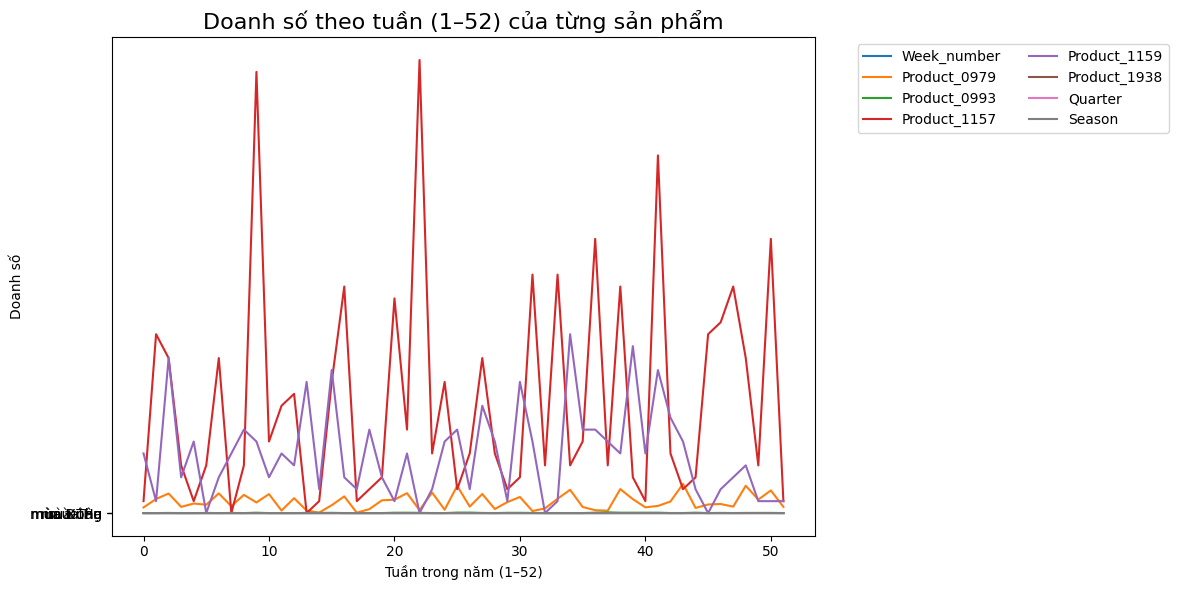

In [85]:
plt.figure(figsize=(12,6))
for product in Weekly_pivot.columns:
    plt.plot(Weekly_pivot.index, Weekly_pivot[product], label=product, alpha=1)
plt.title("Doanh số theo tuần (1–52) của từng sản phẩm", fontsize=16)
plt.xlabel("Tuần trong năm (1–52)")
plt.ylabel("Doanh số")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

### **Nhận xét về doanh số của các sản phẩm**
- *Product_1157* có doanh số dao động rất mạnh, nhiều tuần đạt đỉnh trên 300.000 → cho thấy mức biến động lớn và không ổn định, có thể mang tính mùa vụ cao 
- *Product_1159* cũng dao động rõ rệt nhưng thấp hơn, tập trung khoảng 50.000–150.000 mỗi tuần.
- *Product_0993* và *Product_0979* duy trì doanh số thấp, ổn định quanh mức 10.000–30.000 → có thể là nhóm sản phẩm tiêu thụ đều đặn.
- *Product_1938* hầu như ít biến động, doanh số thấp nhất trong nhóm
- -> **Sản phẩm 1157 là dòng có biến động mạnh nhất theo tuần (mang tính mùa vụ rõ ràng), trong khi 0979 và 1938 có xu hướng ổn định nhất.**

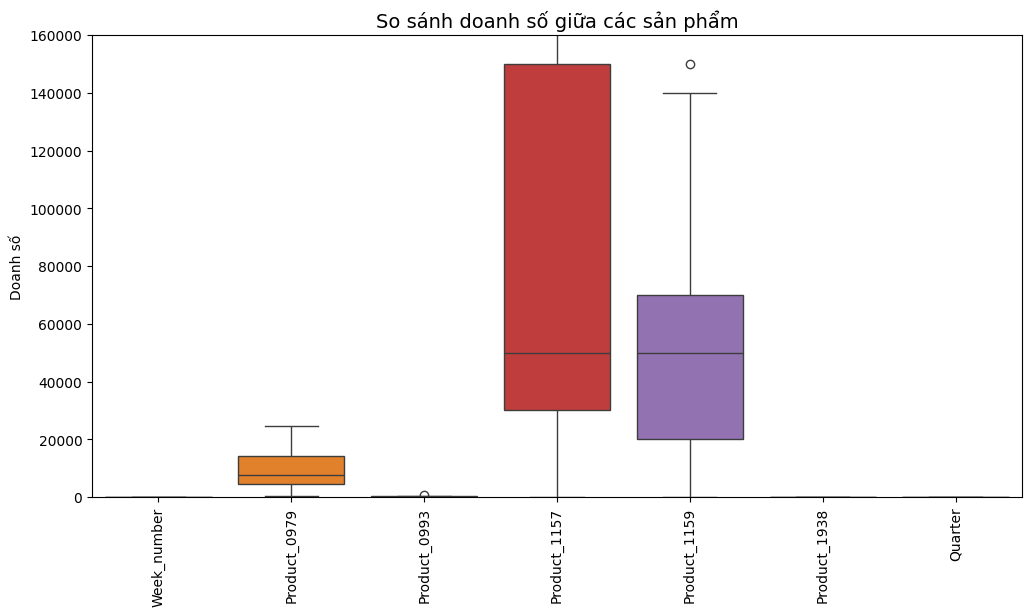

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(data=Weekly_pivot)
plt.title("So sánh doanh số giữa các sản phẩm", fontsize=14)
plt.ylabel("Doanh số")
plt.xticks(rotation=90)
plt.ylim(0, 160000)
plt.show()

### **Nhận xét về phân bố doanh số theo tuần**
- *Product_1157* có doanh số trung vị cao nhất (~50.000) và khoảng biến động rất lớn (từ 0 đến hơn 150.000) → sản phẩm này dao động mạnh và có nhiều tuần đạt doanh số đột biến.
- *Product_1159* cũng có doanh số khá cao và biến động rộng, nhưng ổn định hơn 1157.
- *Product_0979* duy trì mức doanh số thấp, ổn định nhất trong nhóm.
- *Product_0993* và *Product_1938* có doanh số gần như bằng 0 trong phần lớn thời gian → có thể là sản phẩm ít được đặt hàng hoặc ngừng kinh doanh.
- -> **1157 và 1159 là nhóm sản phẩm có doanh số cao nhưng biến động mạnh; 0979 ổn định; còn 0993 và 1938 có doanh số rất thấp.**

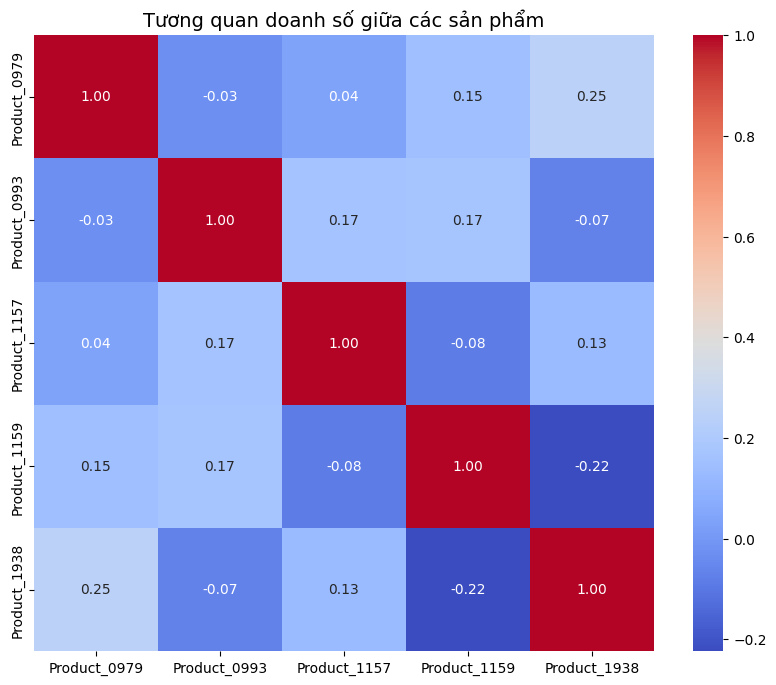

In [87]:
numeric_pivot = Weekly_pivot.select_dtypes(include=['number'])
selected_products = ['Product_0979', 'Product_0993', 'Product_1157', 'Product_1159', 'Product_1938']
subset = numeric_pivot[selected_products]
plt.figure(figsize=(10,8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Tương quan doanh số giữa các sản phẩm", fontsize=14)
plt.show()

### **Nhận xét về tương quan doanh số giữa các sản phẩm**
- Hầu hết các giá trị nằm quanh 0.1 – 0.2, nghĩa là doanh số các sản phẩm gần như độc lập với nhau.
- *Product_0979* và *Product_1938* có tương quan cao nhất (0.25) → hai sản phẩm này có thể cùng tăng hoặc giảm doanh số theo tuần, có thể thuộc cùng nhóm hàng hoặc cùng chịu ảnh hưởng mùa vụ.
- *Product_1159* và *Product_1938* có tương quan âm nhẹ (-0.22) → có thể thay thế cho nhau trong nhu cầu khách hàng.
- Các cặp khác (như 1157–1159, 0993–1157, v.v.) có hệ số tương quan rất nhỏ → không có quan hệ đáng kể.
#### **Nhận xét tổng quát**
- Không có mối tương quan mạnh giữa các sản phẩm, cho thấy doanh số mỗi sản phẩm biến động riêng biệt, có thể do phục vụ nhu cầu khác nhau hoặc nhóm khách hàng riêng biệt.

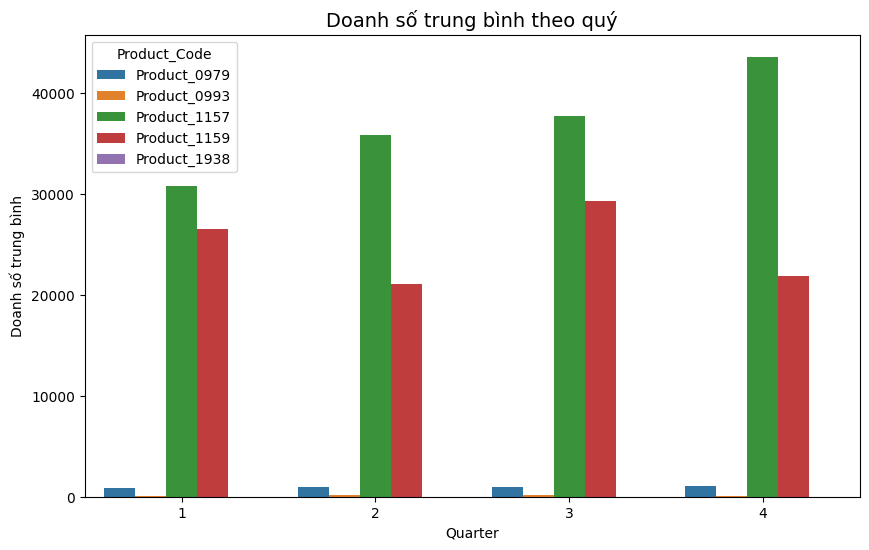

In [88]:
quarterly_sales = df.groupby(['Quarter', 'Product_Code'])['Order_Demand'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Order_Demand', hue='Product_Code')
plt.title("Doanh số trung bình theo quý", fontsize=14)
plt.ylabel("Doanh số trung bình")
plt.show()

### **Nhận xét về doanh số trung bình theo quý của từng sản phẩm**
- *Product_1157* luôn có doanh số trung bình cao nhất trong tất cả các quý, và tăng dần qua các quý (đặc biệt cao ở quý 4) → cho thấy xu hướng tăng trưởng ổn định, có tính mùa vụ mạnh vào cuối năm.
- *Product_1159* đứng thứ hai, nhưng có dao động đáng kể giữa các quý: cao ở quý 1 và quý 3, giảm ở quý 2 và 4 → có thể chịu ảnh hưởng theo chu kỳ nhu cầu.
- *Product_0979*, *Product_0993*, và *Product_1938* có doanh số trung bình rất thấp, ít biến động theo quý → các sản phẩm này có thể ổn định nhưng đóng góp nhỏ vào tổng doanh số.
#### **Nhận xét tổng quát:**
- Doanh số toàn bộ nhóm sản phẩm có dấu hiệu tăng dần về cuối năm (đặc biệt ở quý 4).
- Có thể xem quý 4 là mùa cao điểm kinh doanh, phù hợp với đặc điểm nhu cầu tăng mạnh vào thời gian cuối năm (lễ, Tết, tiêu dùng cao).

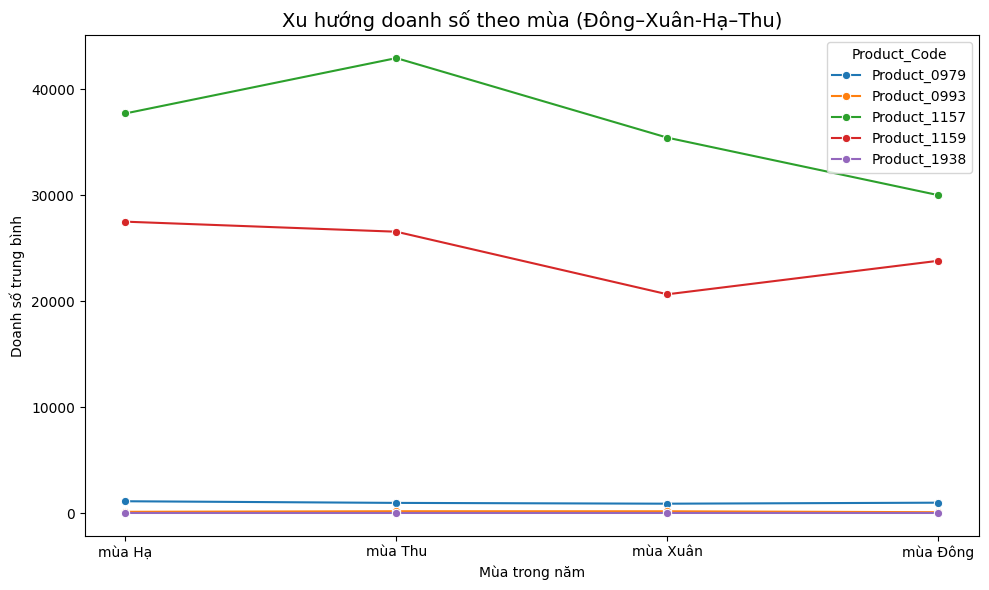

In [89]:
seasonal_sales = df.groupby(['Season', 'Product_Code'])['Order_Demand'].mean().reset_index()
season_order = ["mùa Đông", "mùa Xuân", "mùa Hạ", "mùa Thu"]

plt.figure(figsize=(10,6))
sns.lineplot(data=seasonal_sales, x='Season', y='Order_Demand', hue='Product_Code', marker='o', sort=False)
plt.title("Xu hướng doanh số theo mùa (Đông–Xuân-Hạ–Thu)", fontsize=14)
plt.ylabel("Doanh số trung bình")
plt.xlabel("Mùa trong năm")
plt.tight_layout()
plt.show()

### **Nhận xét về doanh số theo mùa**
- *Product_1157* có doanh số cao nhất trong tất cả các mùa, tăng mạnh từ Hạ lên Thu, đạt đỉnh vào mùa Thu, sau đó giảm dần qua Xuân và Đông → cho thấy mùa Thu là thời điểm tiêu thụ tốt nhất, còn mùa Đông thấp nhất.
- *Product_1159* cũng có xu hướng tương tự: giảm dần từ Hạ đến Xuân, rồi nhích lên nhẹ vào mùa Đông, nhưng vẫn thấp hơn đầu năm → có thể phản ánh chu kỳ nhu cầu ngắn hạn.
- Các sản phẩm còn lại *(Product_0979, 0993, 1938)* có doanh số rất thấp và ổn định, gần như không chịu tác động bởi mùa vụ.
#### **Kết luận phân tích:**
- Có tính mùa vụ rõ ràng, đặc biệt ở hai sản phẩm chủ lực (1157 và 1159).
- Mùa Thu và Hạ là thời điểm doanh số cao nhất, có thể liên quan đến các giai đoạn tiêu dùng mạnh (ví dụ: mùa lễ hội, nhu cầu dự trữ cuối quý).

In [93]:
numeric_pivot = Weekly_pivot.select_dtypes(include=['number'])
selected_products = ['Product_0979', 'Product_0993', 'Product_1157', 'Product_1159', 'Product_1938']
subset = numeric_pivot[selected_products]
# Tính trung bình và độ lệch chuẩn
mean_sales = subset.mean().sort_values(ascending=False)
std_sales = subset.std().sort_values(ascending=False)
seasonality_std = seasonal_sales.groupby('Product_Code')['Order_Demand'].std().sort_values(ascending=False)

insights = {
    "Tổng số sản phẩm": len(subset.columns),
    "Sản phẩm doanh số trung bình cao nhất": mean_sales.index[0],
    "Sản phẩm ổn định nhất (dao động thấp nhất)": std_sales.index[-1],
    "Sản phẩm dao động mạnh nhất": std_sales.index[0],
    "Sản phẩm có biến động mùa vụ mạnh nhất": seasonality_std.index[0]
}
print(" TỔNG HỢP NHẬN XÉT:")
for k, v in insights.items():
    print(f"- {k}: {v}")

 TỔNG HỢP NHẬN XÉT:
- Tổng số sản phẩm: 5
- Sản phẩm doanh số trung bình cao nhất: Product_1157
- Sản phẩm ổn định nhất (dao động thấp nhất): Product_1938
- Sản phẩm dao động mạnh nhất: Product_1157
- Sản phẩm có biến động mùa vụ mạnh nhất: Product_1157
